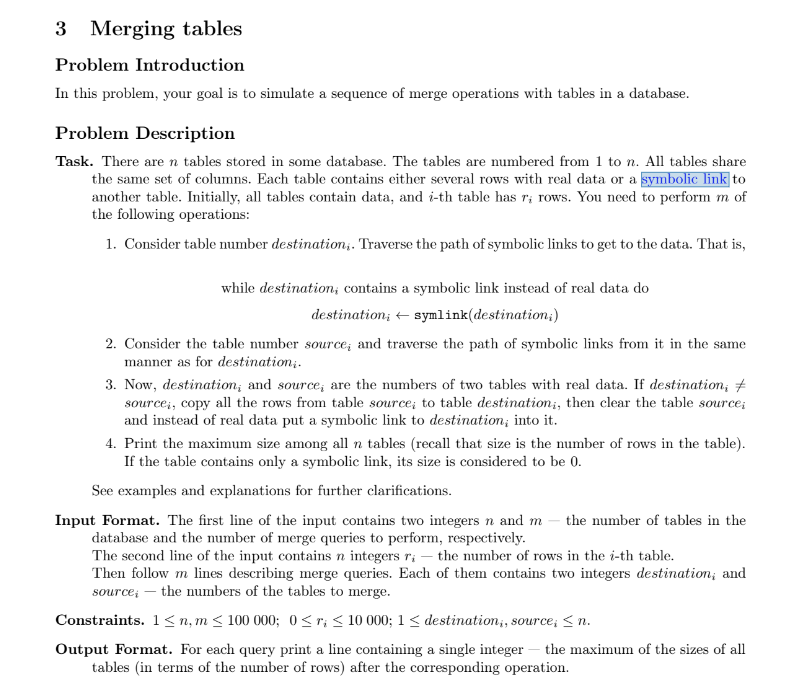

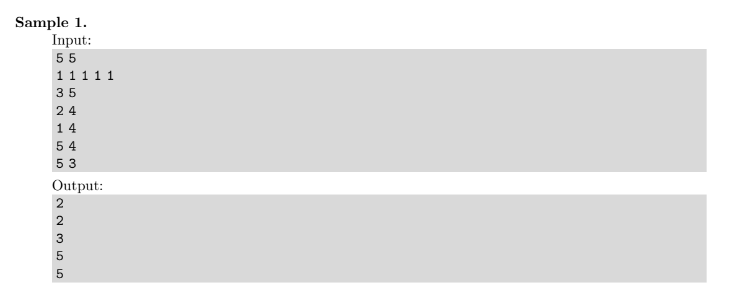

Here there are 5 tables and 5 merge queries to perform.

Each table contains 1 row. 

Then we can see that we need to merge tables 3,5 2,4, 1,4 5,4 and 5,3

In this case all data is copied from table 5 to the table 3 and so we print out 2, which is the maximum number of rows. Then we create a symbolic link in table 5 that points to table 3.

We are likely going to be using disjointed sets for this exercise. The disjoint set is a data structure. 

In [47]:
def merge_tables(n, m, rows, merges):
    """
    Merge tables and track maximum size.
    Args:
        n: number of tables
        m: number of merge operations
        rows: list of initial table sizes
        merges: list of tuples (destination, source) for merge operations
    Returns:
        list of maximum table sizes after each merge operation
    """
    # Initialize with 0-based indexing
    parent = list(range(n))  # Each table points to itself initially
    size = rows.copy()       # Current size of each table
    max_table_size = max(rows)  # Track maximum size
    
    def find(table):
        # Find set representative with path compression
        # Using 0-based indexing, no need for -1 adjustments
        if table != parent[table]:
            parent[table] = find(parent[table])  # Path compression
        return parent[table]
    
    def union(destination, source):
        nonlocal max_table_size
        
        # Find real representatives of the sets
        real_dest = find(destination - 1)  # Convert to 0-based index
        real_source = find(source - 1)
        
        if real_dest == real_source:
            return max_table_size  # Already merged
        
        # Merge source into destination
        parent[real_source] = real_dest
        
        # Update sizes
        size[real_dest] += size[real_source]
        size[real_source] = 0
        
        # Update maximum size if necessary
        max_table_size = max(max_table_size, size[real_dest])
        
        return max_table_size
    
    # Process all merges and collect results
    result = []
    for dest, source in merges:
        current_max = union(dest, source)
        result.append(current_max)
    
    return result